# MAGNETIZATION VECTOR FIELD RECONSTRUCTION: Disc Sample

## Notebook Documentation

<br>
<br>
<img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
Magnetization Vector Field Reconstruction Notebook Documentation is licensed under the Creative Commons Attribution 4.0 International License (2018).
To view a copy of this license, visit http://creativecommons.org/licenses/by/4.0/.

Documentation Authors:
- Marc Rosanes
- Doga Gursoy
- Aurelio Hierro


# Testing the 3D vector field reconstruction algorithm 
## From a reconstructed 3D object to its projections and back


In this notebook we are following the same principle than in the notebook where M4R1 Sample is analyzed. 

In order to test the algorithm, the projections of a reconstructed oject can be computed, and from these projections we can come back to the reconstructed model object. If the appearance of the reconstructed model object from its computed projections is similar to the initial 3D object, this means that the vectorial reconstruction algorithm is performing correctly.



### Testing the 3D vector field reconstruction algorithm


First, let's make the necessary imports

In [2]:
import dxchange
import tomopy
import numpy as np
import matplotlib.pyplot as plt
import time

...let us load the our object: the three components of the magnetization vector all along the object. The shapes will be read in order to verify that the object magnetization components (in this case: $2L^{-1}\delta\vec{m}$) have been correctly loaded. Afterwards we will pad the object in order to have a cubic object.


In [3]:
obx_orig = dxchange.read_tiff('mx_Recon_disk.tif').astype('float32')
oby_orig = dxchange.read_tiff('my_Recon_disk.tif').astype('float32')
obz_orig = dxchange.read_tiff('mz_Recon_disk.tif').astype('float32')

print(np.shape(obx_orig))
print(np.shape(oby_orig))
print(np.shape(obz_orig))

npad = ((27, 27), (0, 0), (0, 0))
obx = np.pad(-obx_orig, npad, mode='constant', constant_values=0)
oby = np.pad(-oby_orig, npad, mode='constant', constant_values=0)
obz = np.pad(obz_orig, npad, mode='constant', constant_values=0)


(10, 64, 64)
(10, 64, 64)
(10, 64, 64)


Check the inputs, to see that the given input datasets are coherent. It can be observed the 'ying-yang' form at the midle of the disc changes its direction with the depth inside the object (changing slice).

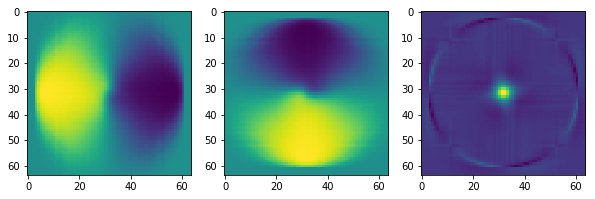

In [4]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(obx[27,:,:])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(oby[27,:,:])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(obz[27,:,:])


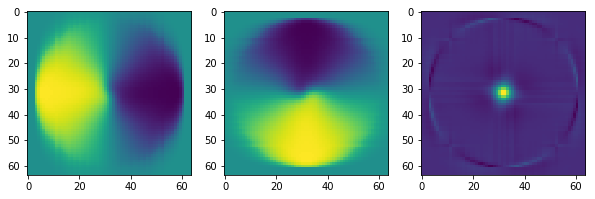

In [5]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(obx[35,:,:])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(oby[35,:,:])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(obz[35,:,:])


...we load the tilt angles, we add to them an offset of 90 degrees and we convert to radians:

In [5]:
tilt_angles_file = 'Tilt_Ang.txt'
ang = np.loadtxt(tilt_angles_file)
ang = -np.array(np.pi/2. + ang * np.pi/180., dtype='float32')

...and calculate the projections of the object taking rotation axes around the three perpendicular cartesian axes:

(121, 64, 64)


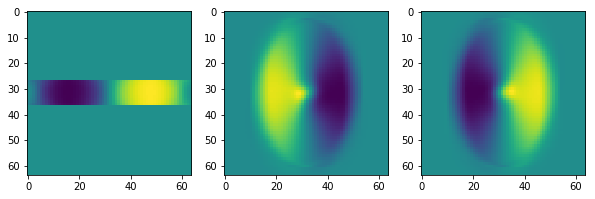

In [6]:
prj1 = tomopy.project3(obx, oby, obz, ang, axis=0, pad=False)
prj2 = tomopy.project3(obx, oby, obz, ang, axis=1, pad=False)
prj3 = tomopy.project3(obx, oby, obz, ang, axis=2, pad=False)
print(np.shape(prj1))
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(prj1[10,:,:])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(prj2[10,:,:])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(prj3[10,:,:])


Finally we will reconstruct the vector magnetization field components (in fact it is the quantity $2L^{-1}\delta\vec{m}$, the one which is reconstructed), taking as input the projections that we have calculated thanks to the first 3D initial object.  

In [7]:
t = time.time()
rec1, rec2, rec3 = tomopy.vector3(prj1, prj2, prj3, ang, ang, ang, axis1=0, axis2=1, axis3=2, num_iter=3)
dxchange.write_tiff(rec1)
dxchange.write_tiff(rec2)
dxchange.write_tiff(rec3)
print (time.time()-t)
print(np.shape(rec1))
print(np.shape(rec2))
print(np.shape(rec3))

9.19873285294
(64, 64, 64)
(64, 64, 64)
(64, 64, 64)


# Comparison of the test results

In this section, we compare the results of the magnetization vector field components obtained thanks to the tomopy reconstruction, against the magnetization vector field components of the object given as input:

## Comparison of the first component results: first component

Comparison of the first magnetization vector component against the input data object.

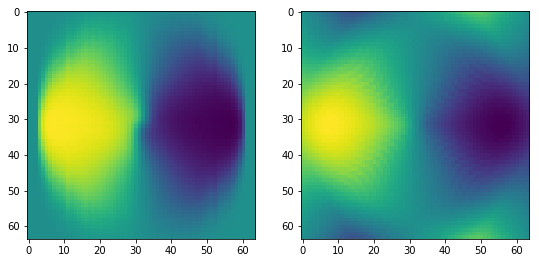

In [8]:
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(obx[27,:,:])
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(rec1[27,:,:])

## Comparison of the second component results: second component

Comparison of the second magnetization vector component against the input data object:


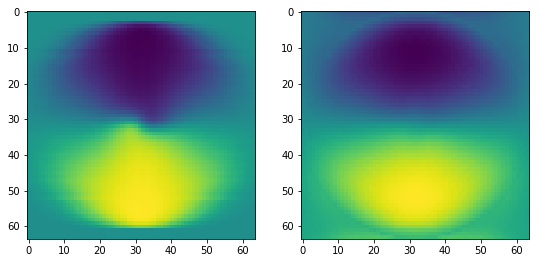

In [9]:
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(oby[27,:,:])
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(rec2[27,:,:])

## Comparison of the third component results: third component

Comparison of the third magnetization vector component against the input data object:


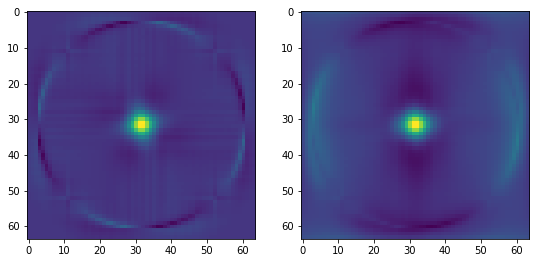

In [10]:
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(obz[27,:,:])
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(rec3[27,:,:])

## Comparison of the first component results (other slice): first component

Comparison of the first magnetization vector component against the input data object.

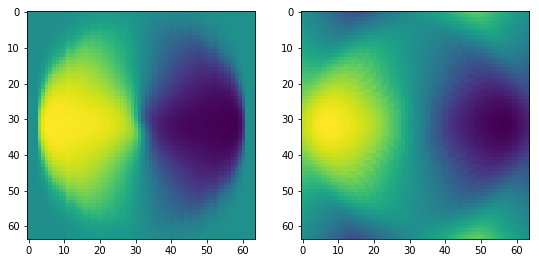

In [11]:
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(obx[35,:,:])
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(rec1[35,:,:])

## Comparison of the second component results (other slice): second component

Comparison of the second magnetization vector component against the input data object:


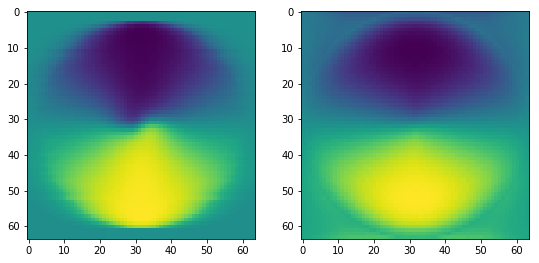

In [12]:
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(oby[35,:,:])
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(rec2[35,:,:])


## Comparison of the third component results (other slice): third component

Comparison of the third magnetization vector component against the input data object:


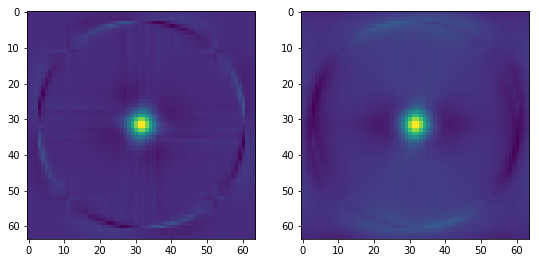

In [13]:
fig = plt.figure(figsize=(9, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(obz[35,:,:])
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(rec3[35,:,:])